### 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

### 데이터

In [2]:
train = pd.read_csv("../DATA/train.csv")
test = pd.read_csv("../DATA/test.csv")

In [3]:
columns = ['PIA205B-02A_MIN','PIA205B-02A_MAX','PRESSURE-S','FI_SUM','FY_SUM','TI_MEAN','LP_TOTAL','FIA_SUM','STN-MFR-S']

In [4]:
upper_list = []
lower_list = []

for col in columns :
    std = np.std(train[col])
    mean = np.mean(train[col])
    upper = mean + 6 * std
    lower = mean - 6 * std
    upper_list.append(upper)
    lower_list.append(lower)

In [5]:
line = pd.DataFrame()
line['columns'] = columns
line['upper'] = upper_list
line['lower'] = lower_list

In [13]:
line

,columns,upper,lower
0,PIA205B-02A_MIN,26.329110,11.328526
1,PIA205B-02A_MAX,26.371509,11.355088
2,PRESSURE-S,113.034327,89.767924
3,FI_SUM,59.674726,-12.575032
4,FY_SUM,70.529215,-13.527786
5,TI_MEAN,-121.282315,-168.539464
6,LP_TOTAL,1546.088607,-565.282952
7,FIA_SUM,15.045870,-14.404812
8,STN-MFR-S,1423.843338,-556.810143


In [6]:
#line.to_csv("../DATA/line.csv")

Text(0.5, 1.0, 'PIA205B-02A_MIN')

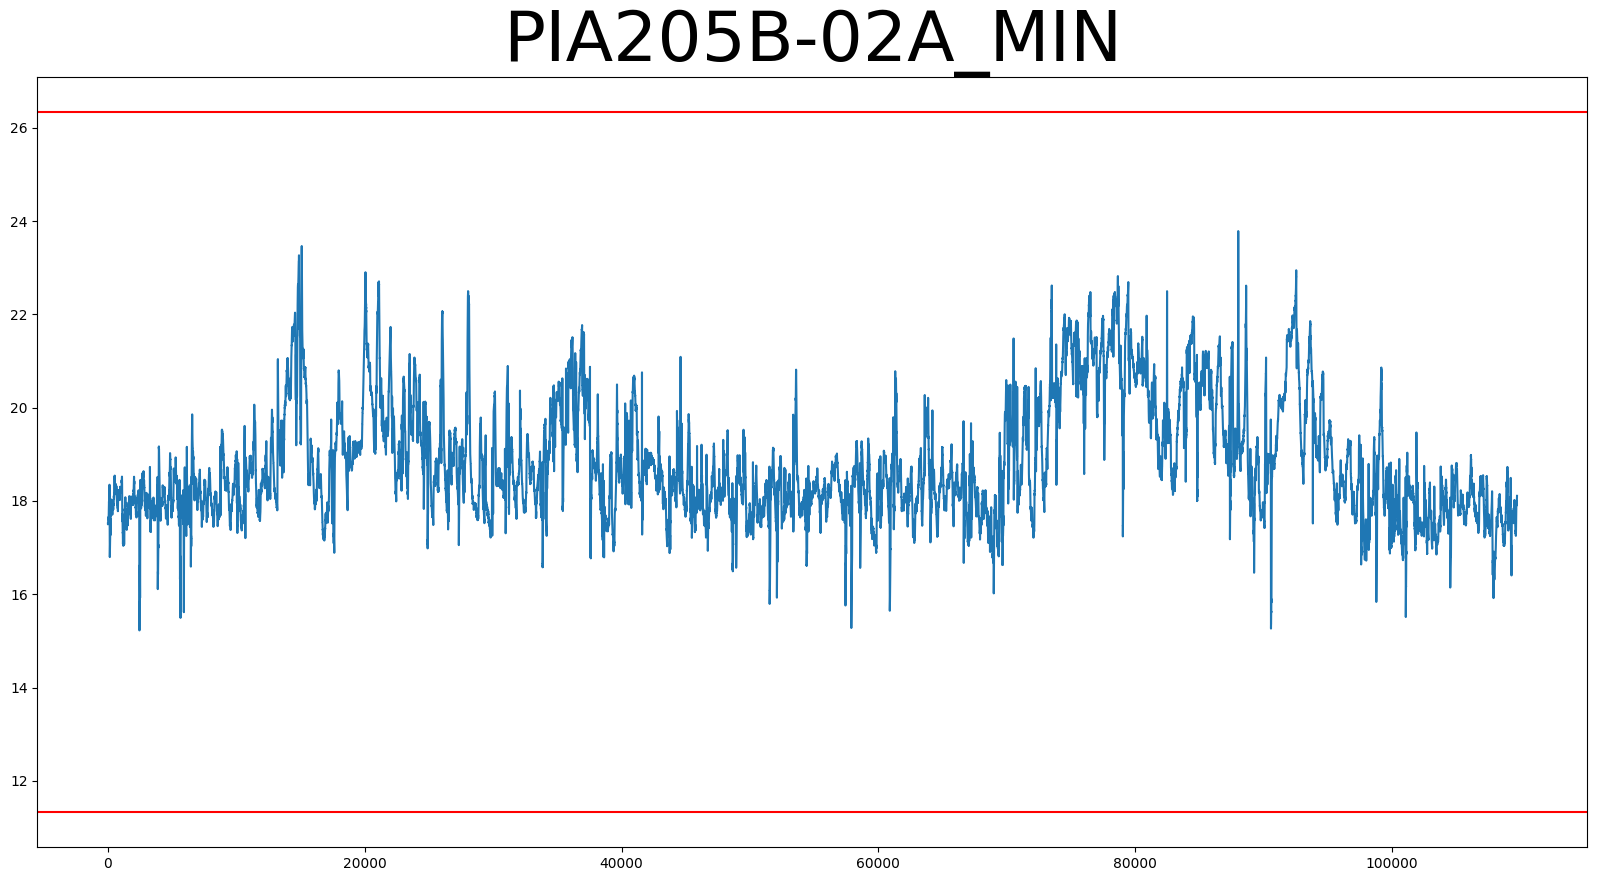

In [31]:
i = 0
plt.figure(figsize = (20,10))
plt.plot(train[columns[i]])
plt.axhline(line['upper'][i],c = "r")
plt.axhline(line['lower'][i],c = "r")
plt.title(columns[i],size = 50)

### 이상치처리

In [9]:
for col_index in tqdm(range(len(line))) :
    for num in tqdm(range(len(train))) :
        if (train[line['columns'][col_index]][num] > line['upper'][col_index]) or (train[line['columns'][col_index]][num] < line['lower'][col_index]) :
            train[line['columns'][col_index]][num] = np.nan
        else :
            pass

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

  0%|          | 0/109728 [00:00<?, ?it/s]

In [10]:
train.isna().sum()

ZIH120-02             0
PIA205B-02A_MIN       0
PIA205B-02A_MAX       0
PRESSURE-S           39
FI_SUM                0
FY_SUM                0
TI_MEAN               0
LP_TOTAL            116
FIA_SUM            1694
STN-MFR-S             0
기온                    0
습도                    0
풍향                    0
datetime              0
lunMonth              0
lunDay                0
lunYear               0
dtype: int64

In [11]:
for col_index in tqdm(range(len(line))) :
    for num in tqdm(range(len(test))) :
        if (test[line['columns'][col_index]][num] > line['upper'][col_index]) or (test[line['columns'][col_index]][num] < line['lower'][col_index]) :
            test[line['columns'][col_index]][num] = np.nan
        else :
            pass

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

  0%|          | 0/33048 [00:00<?, ?it/s]

In [12]:
test.isna().sum()

datetime              0
ZIH120-02             0
PIA205B-02A_MIN       0
PIA205B-02A_MAX       0
PRESSURE-S         5739
FI_SUM                0
FY_SUM                0
TI_MEAN               0
LP_TOTAL            194
FIA_SUM            2160
STN-MFR-S             0
기온                    0
습도                    0
풍향                    0
lunMonth              0
lunDay                0
lunYear               0
dtype: int64

In [13]:
train.to_csv("../DATA/train_na.csv",index = False)
test.to_csv("../DATA/test_na.csv",index = False)